In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/gene_expression.csv")

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<Axes: xlabel='Gene One', ylabel='Gene Two'>

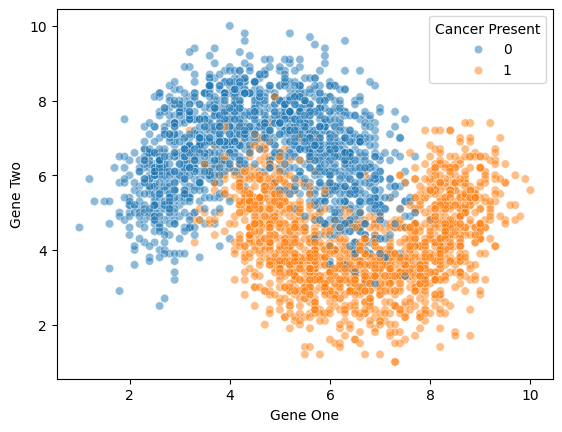

In [10]:
sns.scatterplot(data=df, x="Gene One", y="Gene Two", hue="Cancer Present", alpha=0.5)

(4.0, 8.0)

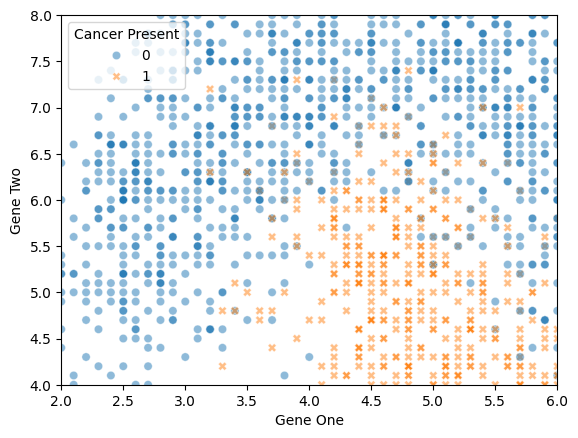

In [12]:
sns.scatterplot(data=df, x="Gene One", y="Gene Two", hue="Cancer Present", style="Cancer Present", alpha=0.5)
plt.xlim(2,6)
plt.ylim(4,8)

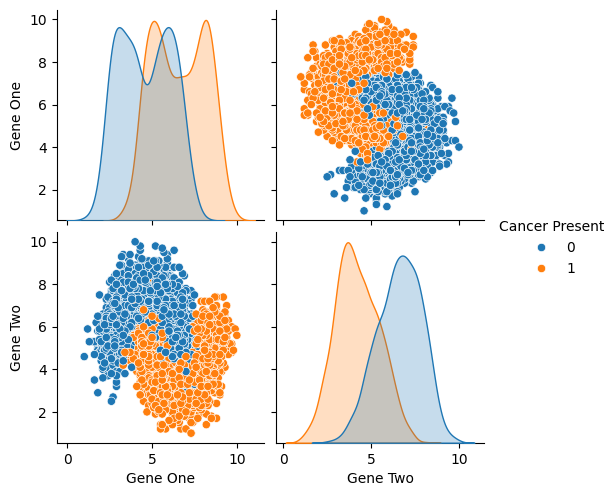

In [13]:
sns.pairplot(data=df, hue="Cancer Present")

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.drop("Cancer Present", axis=1)

In [18]:
y = df["Cancer Present"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)

In [22]:
scaled_X_test = scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred = knn_model.predict(scaled_X_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
confusion_matrix(y_test, y_pred)

array([[422,  48],
       [ 50, 380]])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [30]:
df["Cancer Present"].value_counts()

,count
Cancer Present,
1,1500
0,1500


In [32]:
test_error_rates = []

for k in range(1, 30):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_X_train, y_train)

  y_pred_test = knn_model.predict(scaled_X_test)

  test_error = 1 -accuracy_score(y_test, y_pred_test)

  test_error_rates.append(test_error)

In [33]:
test_error_rates

[0.10888888888888892,
 0.09999999999999998,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06666666666666665,
 0.06444444444444442,
 0.06444444444444442,
 0.05777777777777782,
 0.06333333333333335,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'К ближайших соседий')

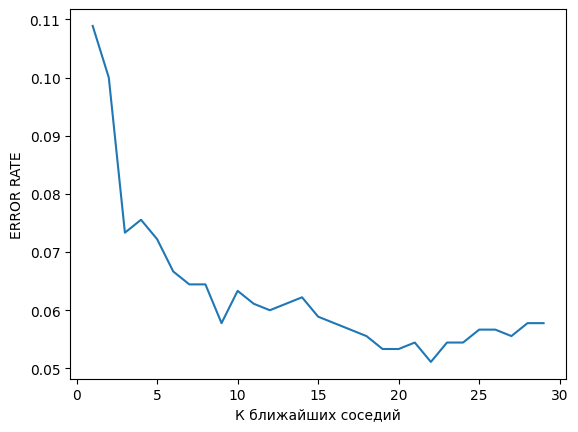

In [34]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel("ERROR RATE")
plt.xlabel("К ближайших соседий")

(0.0, 0.11)

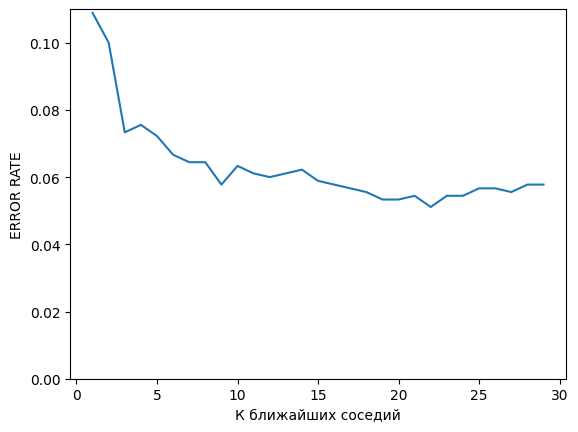

In [35]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel("ERROR RATE")
plt.xlabel("К ближайших соседий")
plt.ylim(0, 0.11)

In [36]:
scaler = StandardScaler()

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [39]:
operations = [("scaler", scaler), ("knn", knn)]

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
pipe = Pipeline(operations)

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
k_values = list(range(1,20))

In [45]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [46]:
param_grid = {"knn__n_neighbors":k_values}

In [47]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

In [48]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [50]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [52]:
full_pred = full_cv_classifier.predict(X_test)

In [53]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [54]:
new_patient = [[3.8, 6.4]]

In [55]:
full_cv_classifier.predict(new_patient)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [56]:
full_cv_classifier.predict_proba(new_patient)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])